# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education. 

Due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms. 
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers, 
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert



**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn. 
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc 
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [1]:
# Libraries for data manipulation
import pandas as pd
import numpy as np

# Libraries for data visualization

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# setting up pandas
pd.set_option("display.max_columns", None)

In [2]:
# libraries for modeling

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Metrics to evaluate the model
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve,recall_score
from sklearn import tree


# For tuning the model
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK, space_eval
from sklearn.model_selection import GridSearchCV

In [3]:
exlearn = pd.read_csv('ExtraaLearn.csv')

In [4]:
data = exlearn.copy()

## Data Overview

- Observations
- Sanity checks

In [5]:
data.head(2)
#data.tail(2)

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0


In [6]:
data.shape

(4612, 15)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

## Exploratory Data Analysis (EDA)

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. How current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status? 
3. The company uses multiple modes to interact with prospects. Which way of interaction works best? 
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

## Data Preprocessing

- Missing value treatment.
- Feature engineering.
- Outlier detection and treatment.
- Preparing data for modeling 

In [8]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,4612,4612,EXT001,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,4612.0,NaN,NaN,NaN,46.201214,13.161454,18.0,36.0,51.0,57.0,63.0
current_occupation,4612,3,Professional,2616,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first_interaction,4612,2,Website,2542,NaN,NaN,NaN,NaN,NaN,NaN,NaN
profile_completed,4612,3,High,2264,NaN,NaN,NaN,NaN,NaN,NaN,NaN
website_visits,4612.0,NaN,NaN,NaN,3.566782,2.829134,0.0,2.0,3.0,5.0,30.0
time_spent_on_website,4612.0,NaN,NaN,NaN,724.011275,743.828683,0.0,148.75,376.0,1336.75,2537.0
page_views_per_visit,4612.0,NaN,NaN,NaN,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434
last_activity,4612,3,Email Activity,2278,NaN,NaN,NaN,NaN,NaN,NaN,NaN
print_media_type1,4612,2,No,4115,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
data.duplicated().value_counts()

False    4612
Name: count, dtype: int64

- There is no missing data or duplicate rows.
- The data types are well set, since this is a small dataset there's no need for creating categorical data.

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [10]:
# Categorical variables list
cat_col = list(data.select_dtypes("object").columns)

# Printing value counts for each categorical column, removing the first column ID
for column in cat_col[1::]:
    print(data[column].value_counts())
    print("-" * 50)

current_occupation
Professional    2616
Unemployed      1441
Student          555
Name: count, dtype: int64
--------------------------------------------------
first_interaction
Website       2542
Mobile App    2070
Name: count, dtype: int64
--------------------------------------------------
profile_completed
High      2264
Medium    2241
Low        107
Name: count, dtype: int64
--------------------------------------------------
last_activity
Email Activity      2278
Phone Activity      1234
Website Activity    1100
Name: count, dtype: int64
--------------------------------------------------
print_media_type1
No     4115
Yes     497
Name: count, dtype: int64
--------------------------------------------------
print_media_type2
No     4379
Yes     233
Name: count, dtype: int64
--------------------------------------------------
digital_media
No     4085
Yes     527
Name: count, dtype: int64
--------------------------------------------------
educational_channels
No     3907
Yes     705
Name

- From the statistical summary we get to know that the column ID has 4612 unique values, this field gives us no valuable information to feed to our model, so we drop it.

In [11]:
data.drop(["ID"], axis = 1, inplace = True)

### Numerical Variables

In [12]:
def hist_and_box(col_name, bins=24, kde=True):
       fig, axes=plt.subplots(2, sharex=True, figsize=(10,7), gridspec_kw={'height_ratios':(1,3)})
       fig.suptitle(col_name)
       sns.boxplot(ax=axes[0], data=data, x=col_name, showmeans= True)
       sns.histplot(ax=axes[1], data=data, x=col_name, bins=bins, kde=kde)
       axes[1].axvline(data[col_name].mean(), linestyle='--', color= 'green')
       axes[1].axvline(data[col_name].median(), linestyle='-', color= 'black')

In [13]:
num_col = list(data.select_dtypes(exclude="object").columns)
print(num_col)

['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit', 'status']


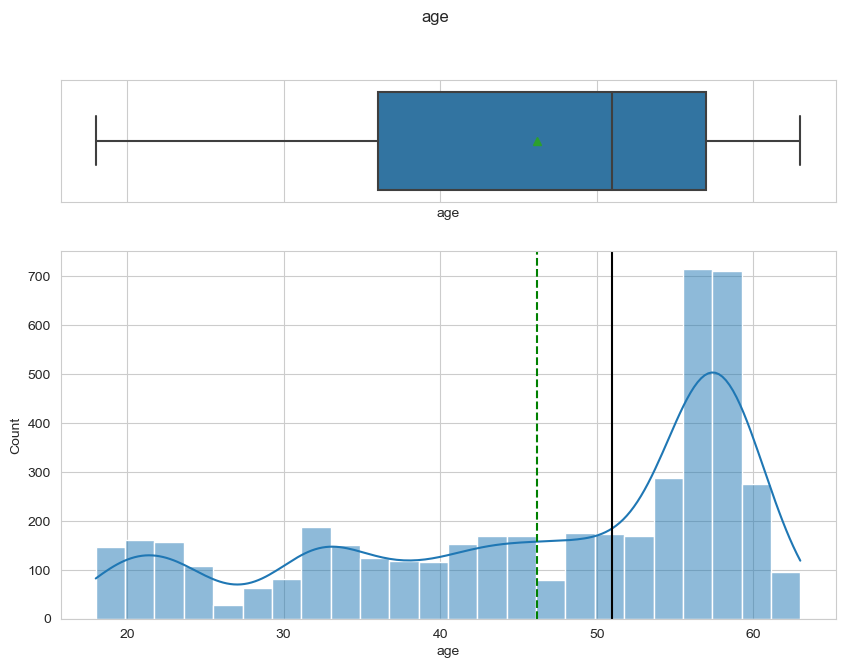

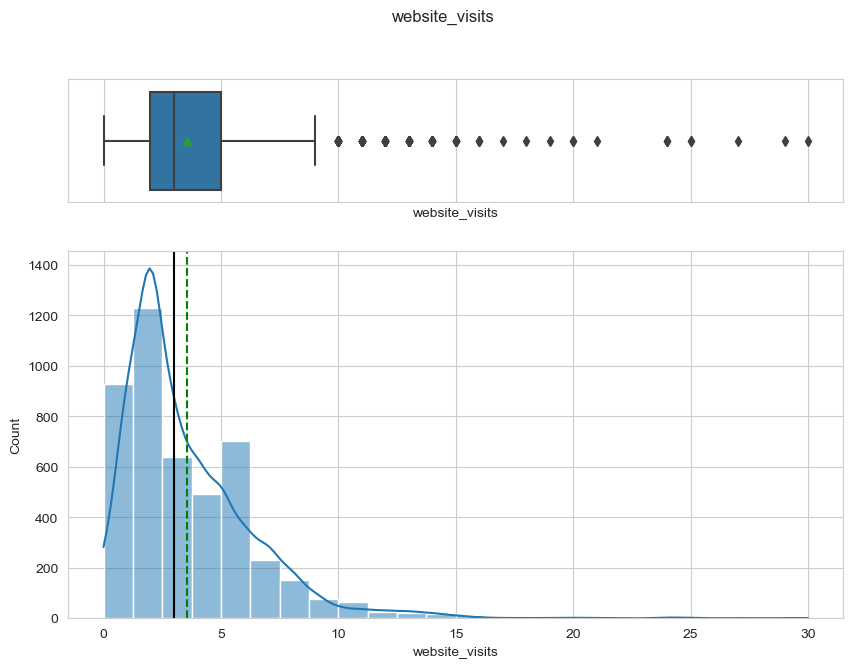

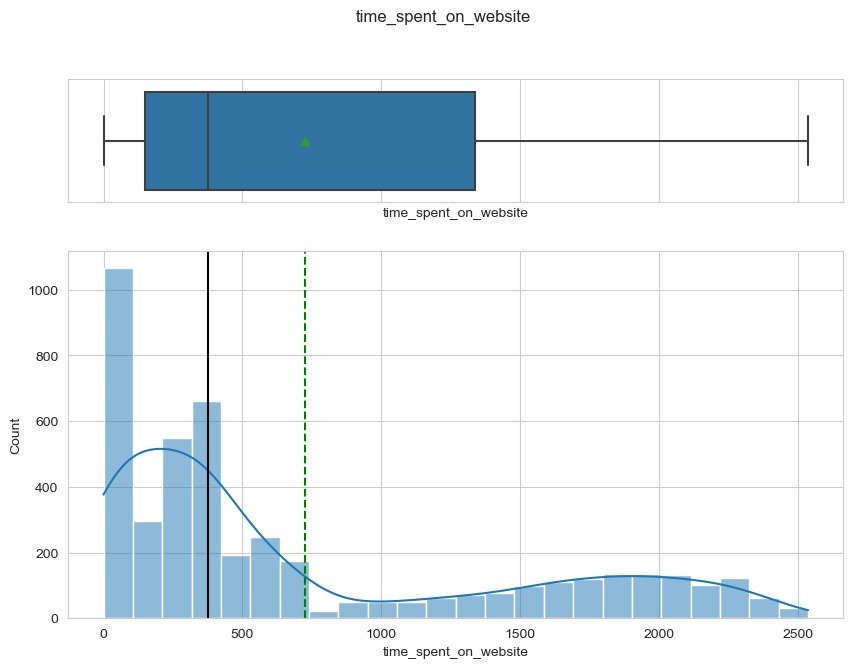

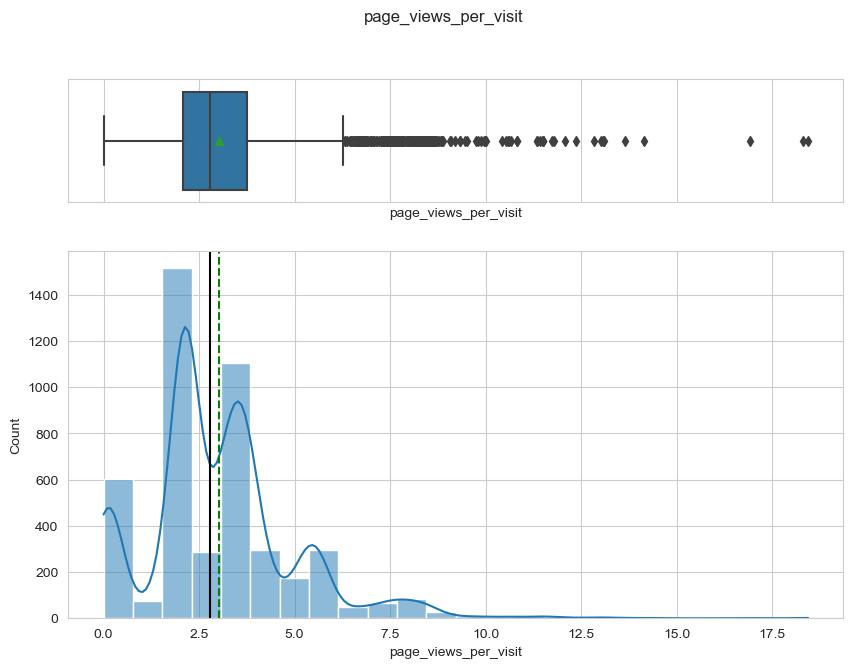

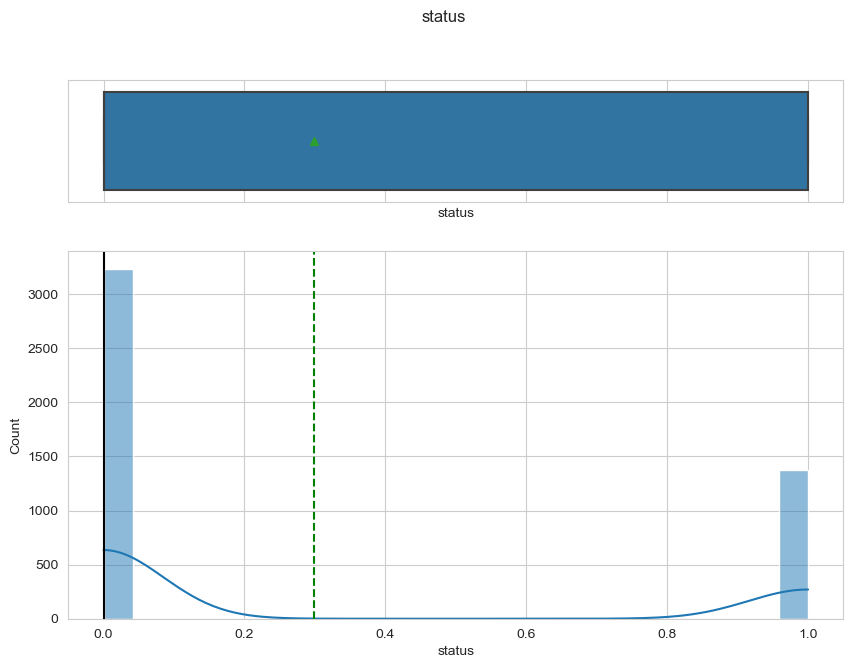

In [14]:
for col in num_col:
    hist_and_box(col)

In [15]:
data[num_col].describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434
status,4612.0,0.298569,0.457680,0.0,0.00000,0.000,1.00000,1.000


In [16]:
data[data["website_visits"] == 0].shape

(174, 14)

- **Age**: Age has an almost uniform distribution, a mean of 46.2 and a median of 51 years old, the biggest peak is around 57 years old.
- **Website Visits**: There are a lot of outliers in website visits, it has a right-skewed distribution. The top 25% of individuals visited the website more than 5 times, with a maximum number of visits being 30.
- **Time spent on the website**: Right skewed distribution with std of 743. High spread and no statistical outliers.
- **Page views per visit**: Low spread, mean of 3.02 and q1 and q3 interquantile range from 2.1 to 3.7. There are several statistical outliers.
- 174 leads never visited the website

### Categorical Variables

In [17]:
cat_col = list(data.select_dtypes("object").columns)

In [18]:
def count_cat(col_name):
    #define figsize
    plt.figure(figsize=(15,8))
    #create a count plot
    ax=sns.countplot(data=data, x=col_name)
    #annotate the plot
    total = float(len(data))
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height/total:.1%}', (p.get_x() + p.get_width() / 2., height + 0.2), ha='center')


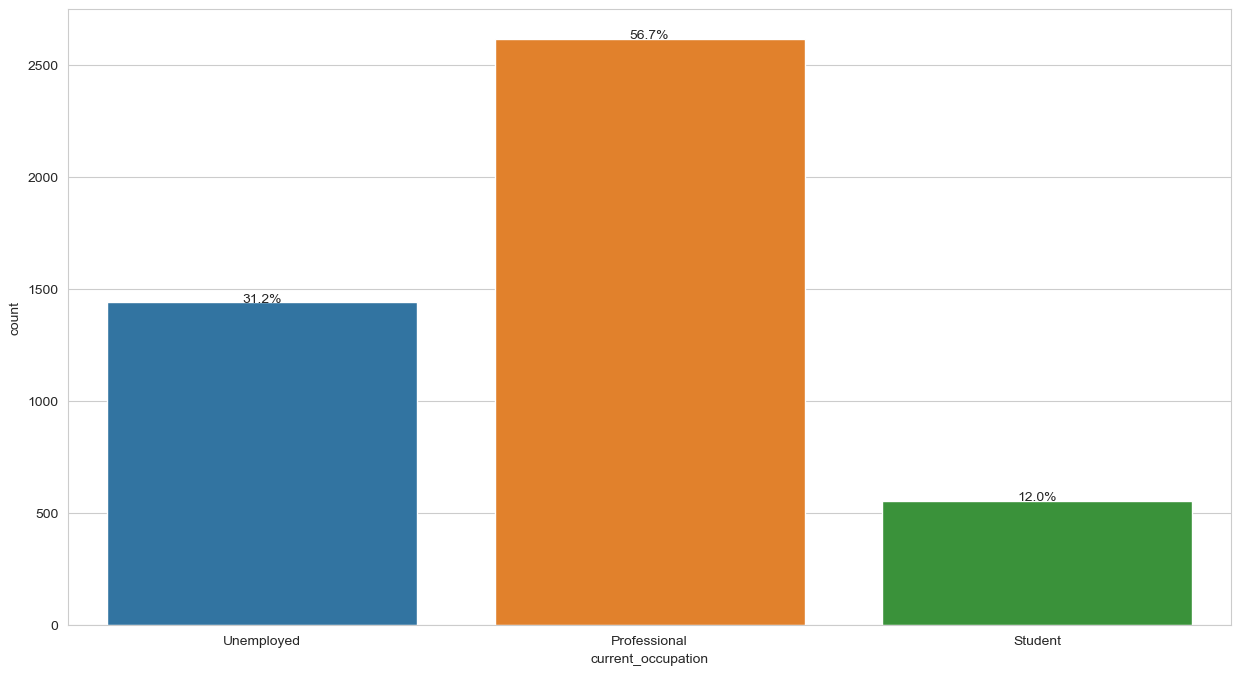

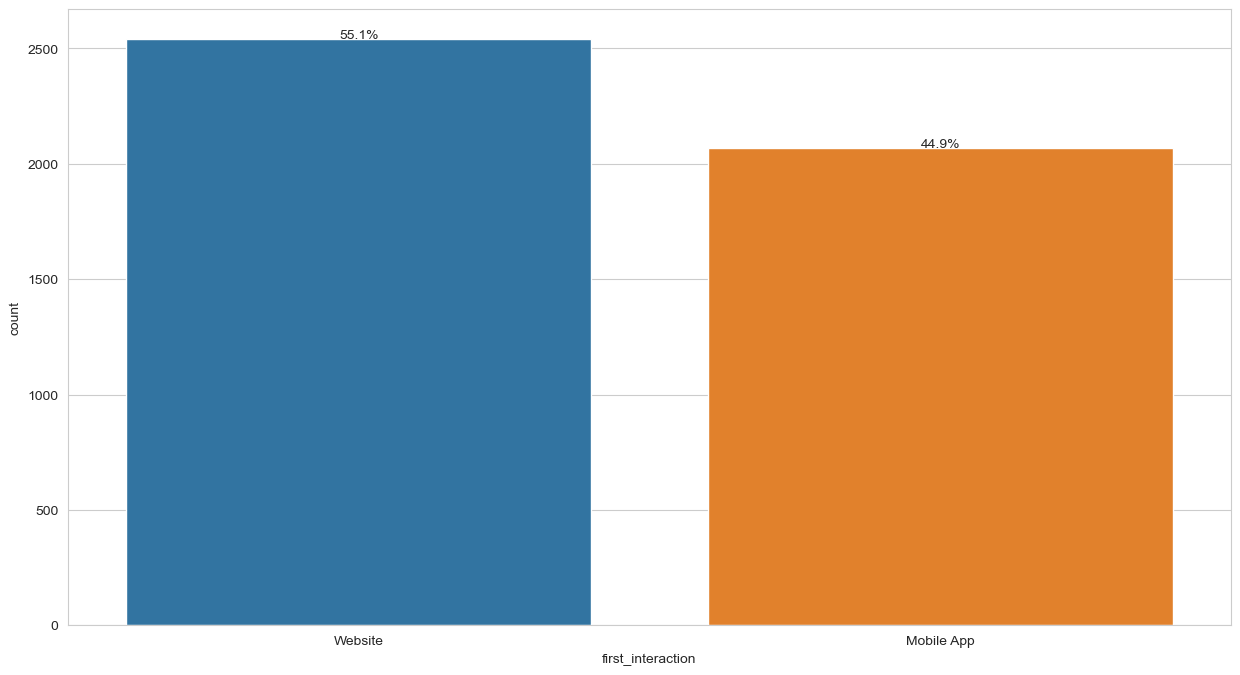

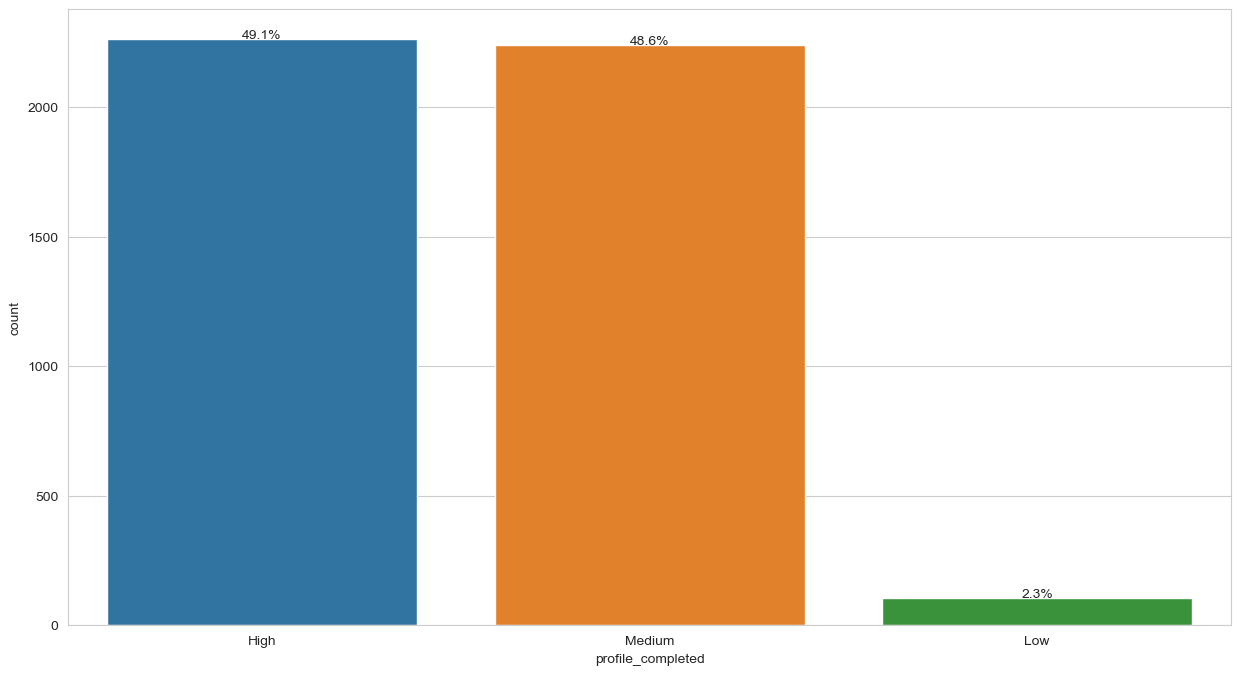

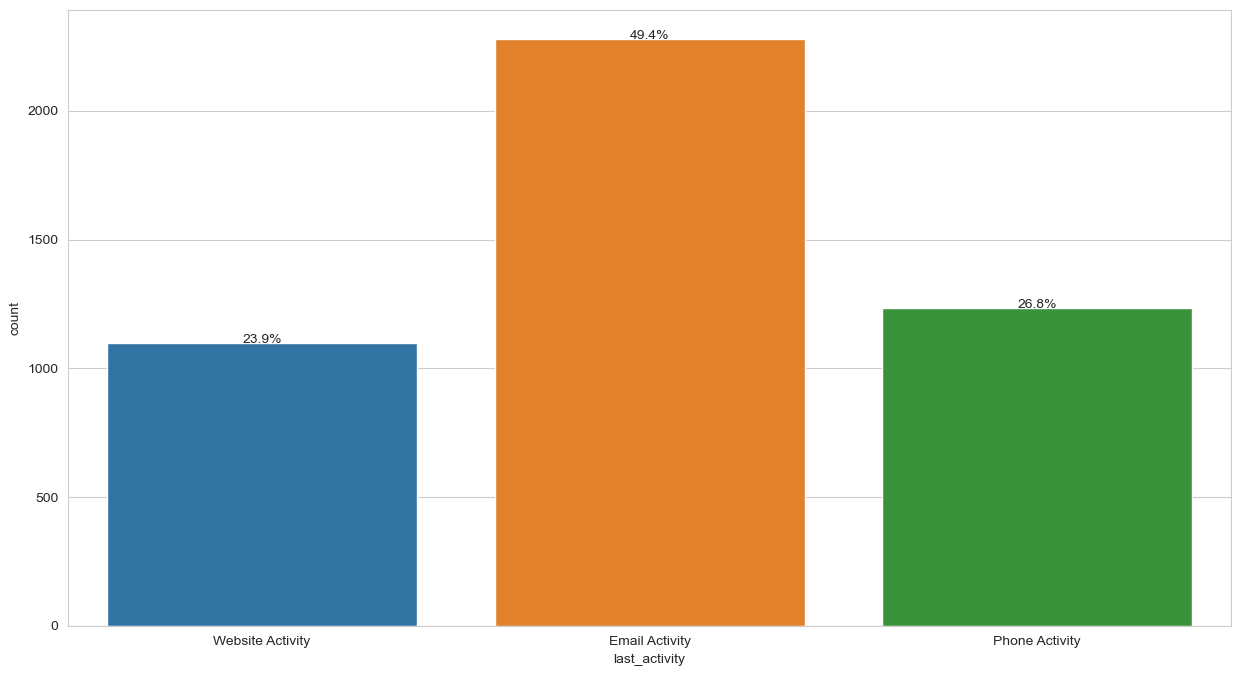

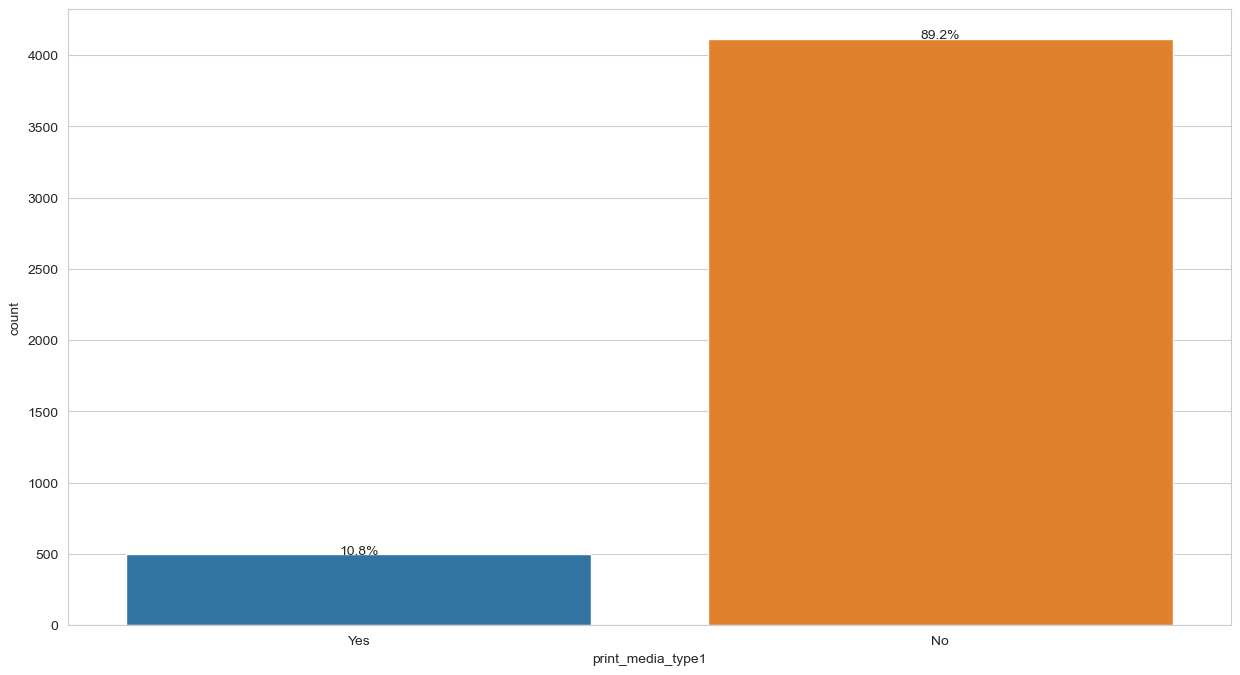

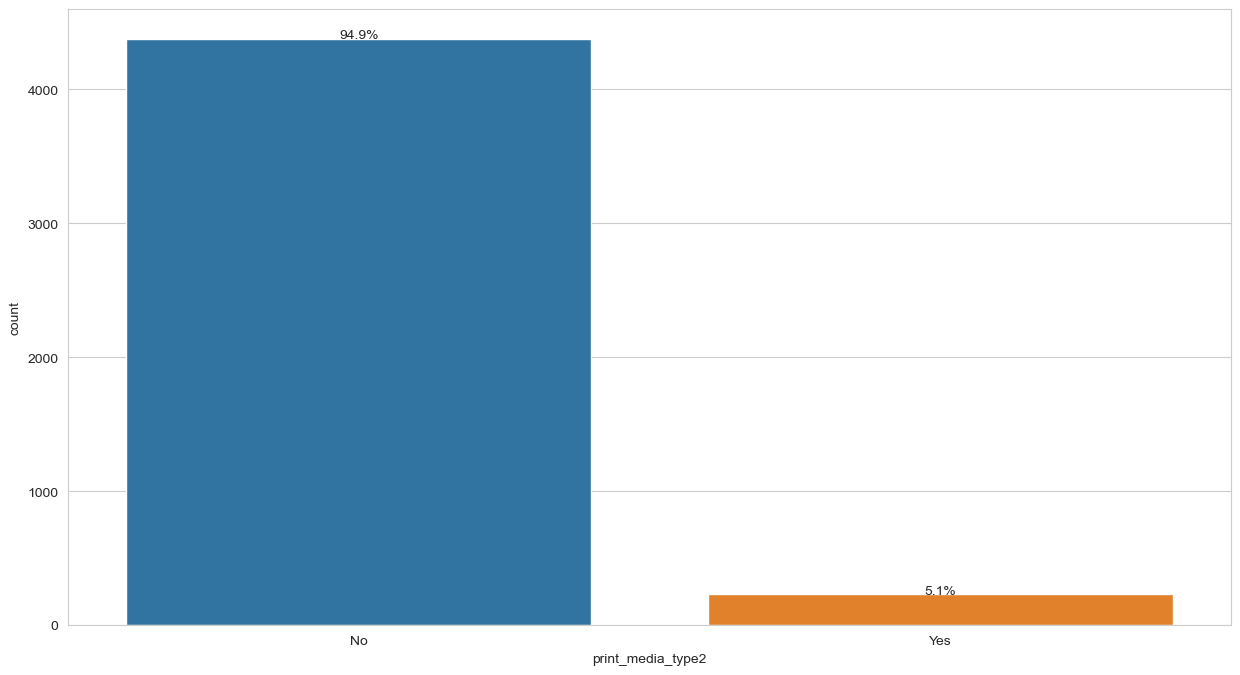

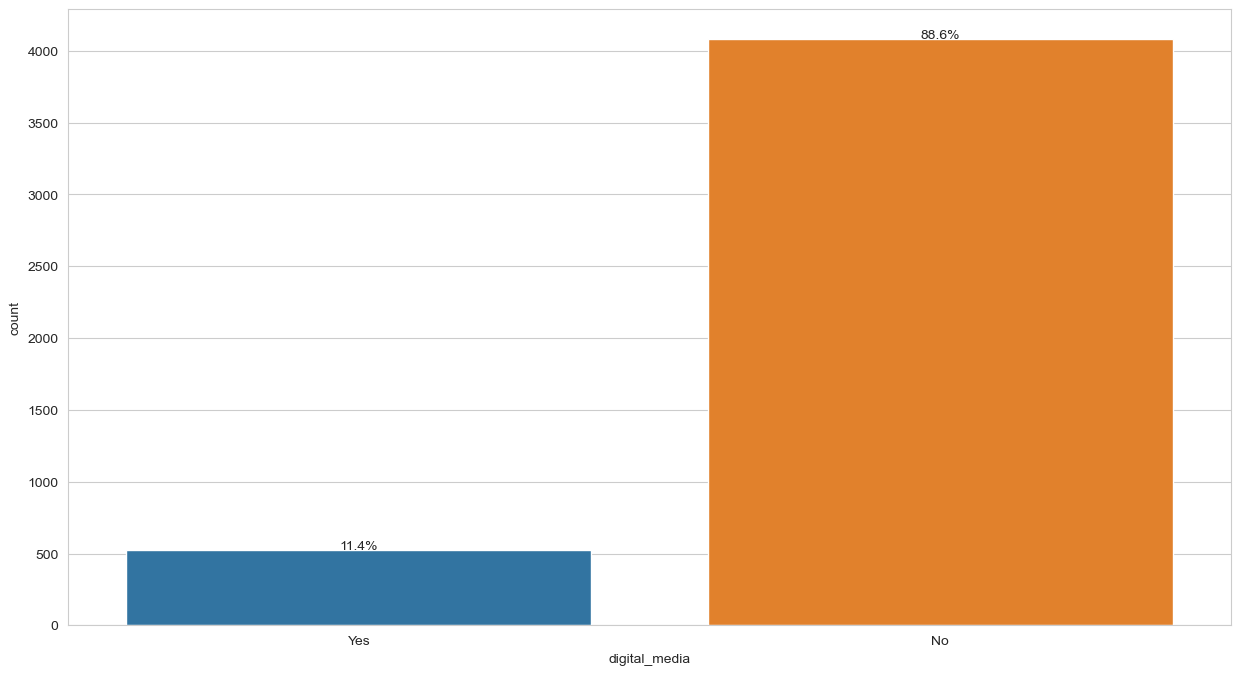

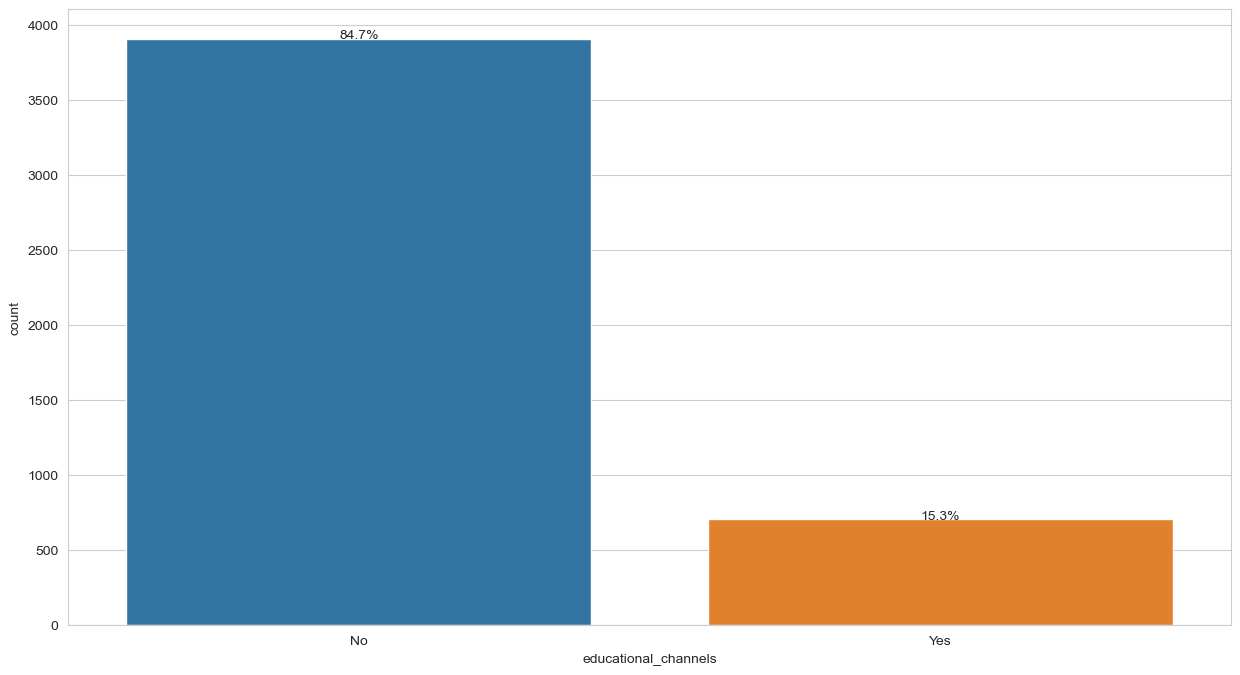

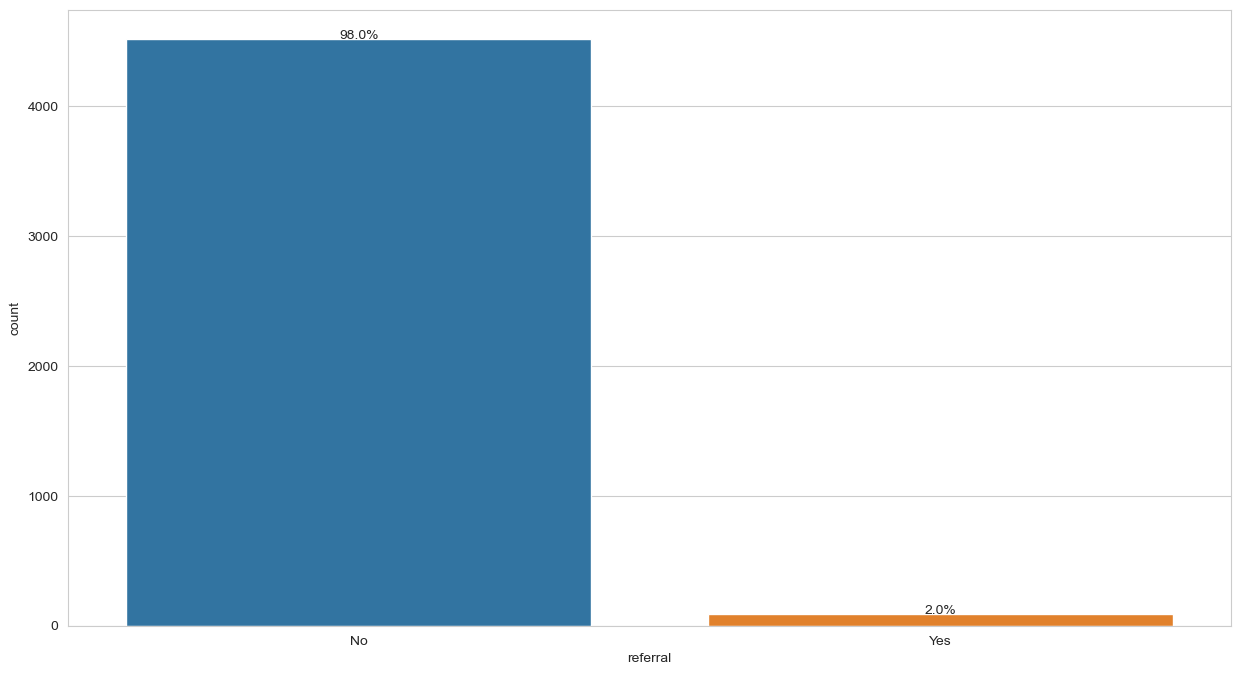

In [19]:
for col in cat_col:
    count_cat(col)

**Current Occupation:** 56.7% of the users are professionals, the second largest occupation is Unemployed with 31.2%, and finally students.  
  
**First Interaction:** 55% of interactions are website-based, the rest occur through the mobile app.  
  
**Profile Completed:** Almost all profiles are evenly distributed between high and medium, and just about 2.3% have a low profile completion rate. We could expect a high correlation in this variable.  
  
**Last Activity:** 49.4% of the last activity happened through email, followed by evenly distributed phone activity and website activity.  
  
**Interaction with media:** On the different way of interaction with the media, almost on every media we got a huge majority that declared that they have *not* gotten information through any of them, these are the *yes* percentages for each category, which shows that the conversion rate through these channels is not that effective.   
  
- Print media type 1: 10.8%
- Print media type 2: 5.1%
- digital media: 11.4%
- educational channels: 15.3%
- Only 2% of the users are referrals

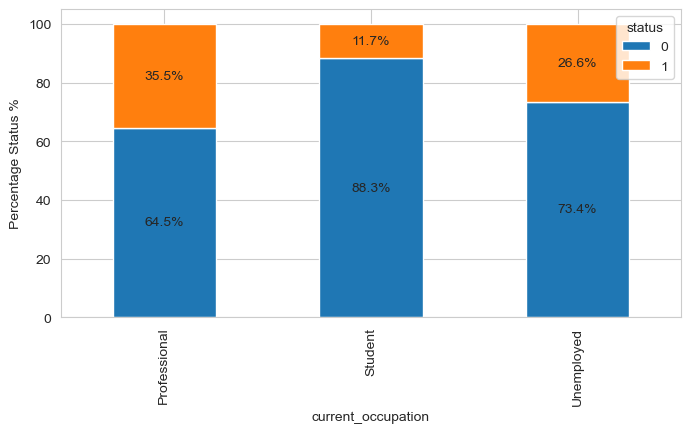

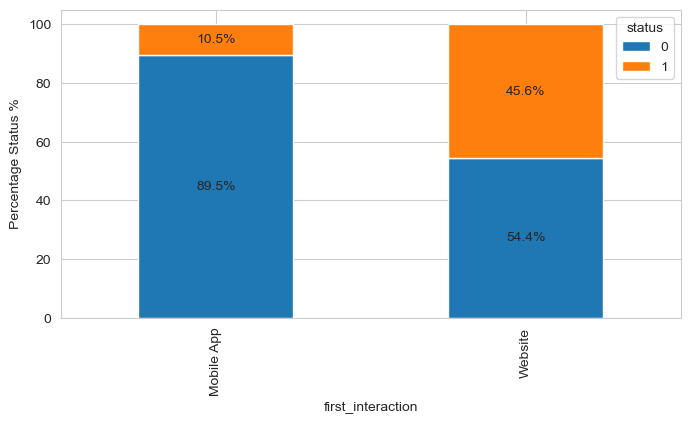

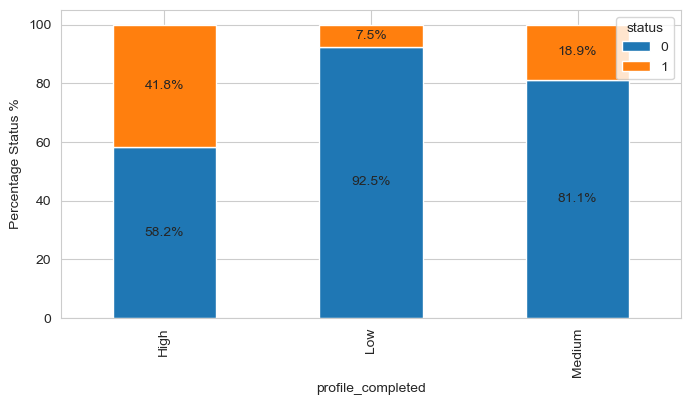

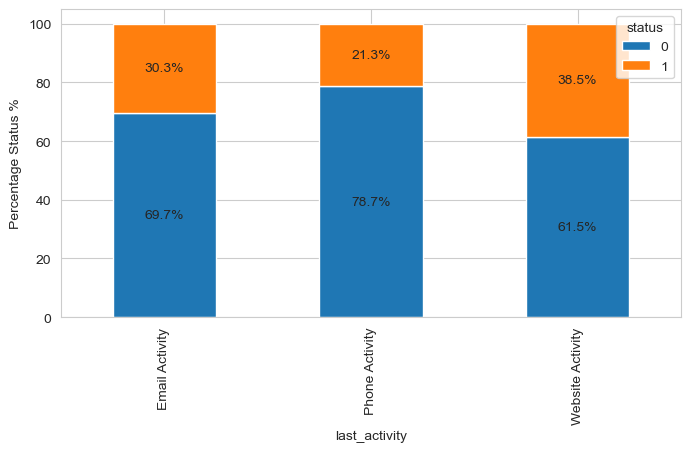

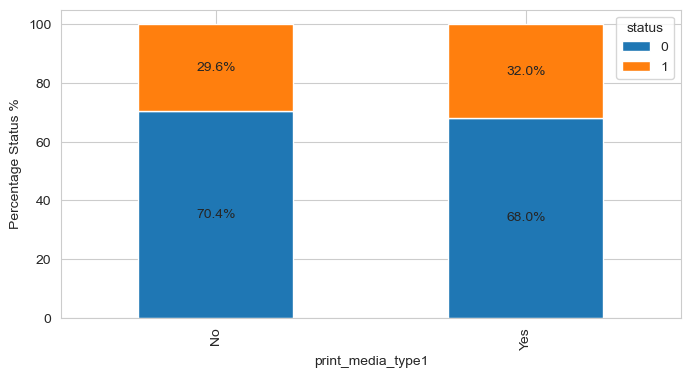

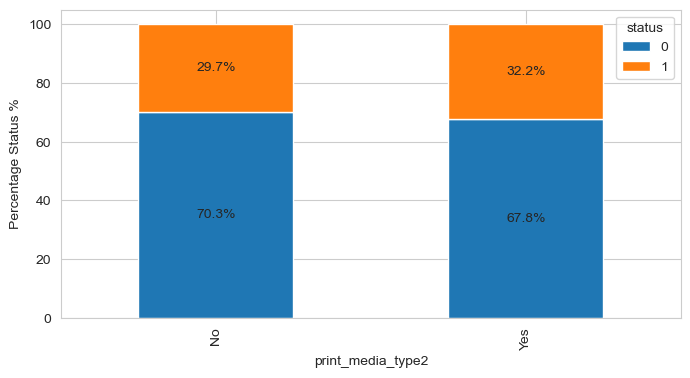

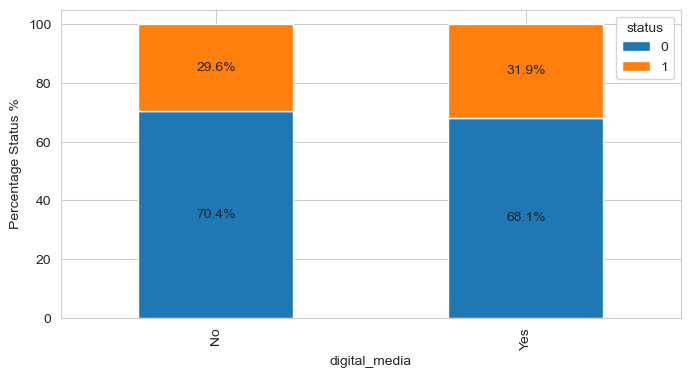

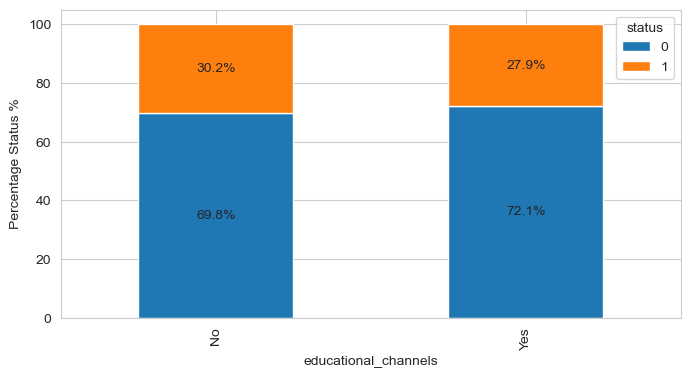

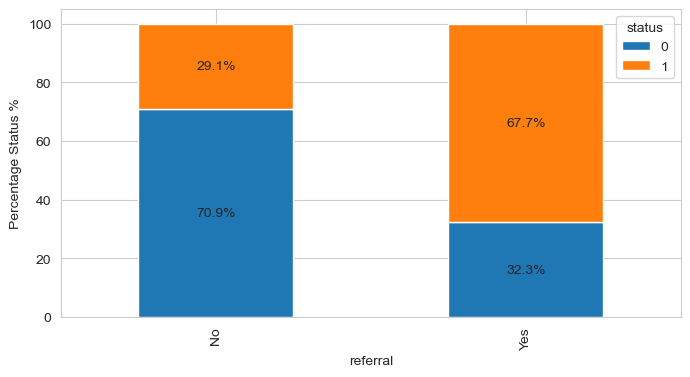

In [20]:
for i in cat_col:
    if i != 'status':
        # Create a crosstab with percentages and plot as a stacked bar chart
        crosstab_df = (pd.crosstab(data[i], data['status'], normalize='index') * 100)
        ax = crosstab_df.plot(kind='bar', figsize=(8, 4), stacked=True)
        
        # Add annotations for percentages on each bar
        for container in ax.containers:
            ax.bar_label(container, label_type='center', fontsize=10, labels=[f'{val:.1f}%' for val in container.datavalues])

        plt.ylabel('Percentage Status %')


- Professionals have the highest conversion rate 35.5%. *Students* have the lowest conversion rate.
- The first interaction through the website has a higher conversion rate of 45.6% compared to the mobile app with just 10.5%
- Users with a profile completion at a level high have a 41.8% conversion rate, much higher than the rest.
- Interaction through different media types seems to have an unimportant effect on conversion, with fairly similar results.
- There are no significant differences between the channels with similar conversion rates among them, having or having not interacted through them.
- Referrals have a high conversion rate at 67.7%, however, only 2% of users are referrals, so the company should encourage or improve actual referral programs.

In [21]:
# Summary of numerical variable statistics analyzed over status
data.groupby(['status'])[num_col].describe().T

status                                 0            1
age                   count  3235.000000  1377.000000
                      mean     45.153014    48.663762
                      std      13.748843    11.293692
                      min      18.000000    18.000000
                      25%      33.000000    41.000000
                      50%      49.000000    54.000000
                      75%      57.000000    58.000000
                      max      63.000000    63.000000
website_visits        count  3235.000000  1377.000000
                      mean      3.578980     3.538126
                      std       2.874222     2.721075
                      min       0.000000     0.000000
                      25%       2.000000     2.000000
                      50%       3.000000     3.000000
                      75%       5.000000     5.000000
                      max      30.000000    25.000000
time_spent_on_website count  3235.000000  1377.000000
                      mean    577.420711  1068.397967
                      std     676.340484   780.856643
                      min       0.000000     0.000000
                      25%      88.000000   390.000000
                      50%     317.000000   789.000000
                      75%     646.000000  1829.000000
                      max    2531.000000  2537.000000
page_views_per_visit  count  3235.000000  1377.000000
                      mean      3.025732     3.027050
                      std       1.997962     1.896893
                      min       0.000000     0.000000
                      25%       2.074500     2.083000
                      50%       2.706000     2.935000
                      75%       3.773500     3.730000
                      max      18.434000    13.656000
status                count  3235.000000  1377.000000
                      mean      0.000000     1.000000
                      std       0.000000     0.000000
                      min       0.000000     1.000000
                      25%       0.000000     1.000000
                      50%       0.000000     1.000000
                      75%       0.000000     1.000000
                      max       0.000000     1.000000

- There is a fairly similar behavior in age through different statuses, however, the mean age is slightly higher for status=1.
- In the case of website visits we have very similar statistics and fairly high dispersion.
- People with status 1 usually spend more time on the website.
- The statistics for page views per visit are very similar, with almost equal mean and median. One can expect that this variable won't have a strong influence.

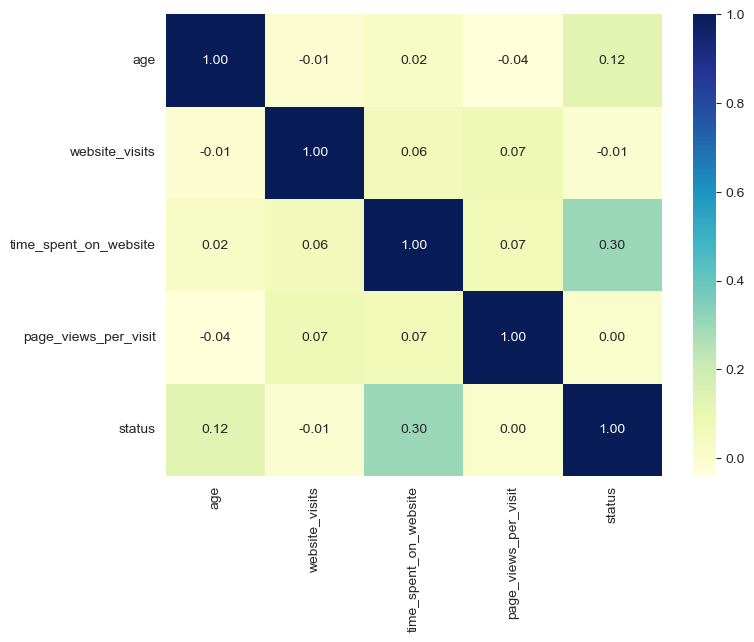

In [22]:
plt.figure(figsize=(8,6))
sns.heatmap(data[num_col].corr(),annot=True, fmt='0.2f', cmap='YlGnBu');

- As seen previously, we confirm that status and time spent on the website have the highest correlation at 0.3.
- Age shows a bland correlation at 0.12.
- The rest of the variables represent a negligible correlation.

## Building a Decision Tree model

##### Data preparation

In [23]:
# Specify the columns for dummy encoding
to_get_dummies_for = ['current_occupation', 'first_interaction', 'profile_completed', 'last_activity']

# Create a new DataFrame for dummy variables
data_dm = data.copy()

data_dm = pd.get_dummies(data = data_dm, columns = to_get_dummies_for, drop_first = True)      


In [24]:
# dictinaries for mapping the dummy variables
dict_pm_type1 = {'Yes': 1, 'No':0}
dict_pm_type2 = {'Yes': 1, 'No': 0}
dict_digital_m = {'Yes': 1, 'No':0}
dict_ed_channels = {'Yes': 1, 'No': 0}
dct_referrals = {'Yes': 1, 'No':0}

# Mapping dummy variables
data_dm['print_media_type1'] = data_dm.print_media_type1.map(dict_pm_type1)
data_dm['print_media_type2'] = data_dm.print_media_type2.map(dict_pm_type2)
data_dm['digital_media'] = data_dm.digital_media.map(dict_digital_m)
data_dm['educational_channels'] = data_dm.educational_channels.map(dict_ed_channels)
data_dm['referral'] = data_dm.referral.map(dct_referrals)

In [25]:
data_dm.head(2)

,age,website_visits,time_spent_on_website,page_views_per_visit,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status,current_occupation_Student,current_occupation_Unemployed,first_interaction_Website,profile_completed_Low,profile_completed_Medium,last_activity_Phone Activity,last_activity_Website Activity
0,57,7,1639,1.861,1,0,1,0,0,1,False,True,True,False,False,False,True
1,56,2,83,0.320,0,0,0,1,0,0,False,False,False,False,True,False,True


In [26]:
# Separating target variable and other variables

Y= data_dm.status
X= data_dm.drop(columns = ['status'])

We have already separated the target variables and the other variables, then we are going to split the data and then scale it and transform it.

In [27]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1, stratify = Y)

In [28]:
# Scaling the data
sc=StandardScaler()

# Fit_transform on train data
X_train_scaled=sc.fit_transform(X_train)
X_train_scaled=pd.DataFrame(X_train_scaled, columns=X.columns)

# Transform on test data
X_test_scaled=sc.transform(X_test)
X_test_scaled=pd.DataFrame(X_test_scaled, columns=X.columns)

### How will we evaluate the model?

We will focus on reducing FN, we prioritize not missing potential customers (leads) who are likely to convert into paying customers. We do not want to miss opportunities even if we waste some resources on leads that won't likely convert.  
For the company is more costly to leave to pass a customer who would have been interested in purchasing the service they provide.

In [29]:
# Creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Converted', 'Converted'], yticklabels=['Not Converted', 'Converted'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

Building the decision tree classifier:

- Since the frequency of class 1 is 29.8% and for class 0 is 70.2% class 0 will be dominant, so we assign weights

In [30]:
# Building decision tree model
dt = DecisionTreeClassifier(class_weight = {0: 0.7, 1: 0.3}, random_state = 42)

In [31]:
# Fitting decision tree model
dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier(class_weight={0: 0.7, 1: 0.3}, random_state=42)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



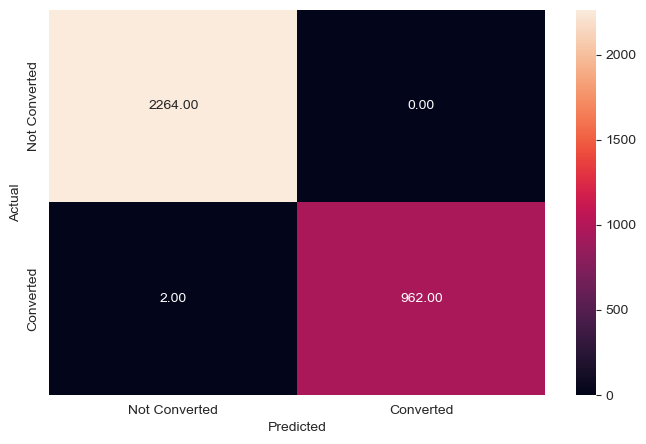

In [32]:
# Checking performance on the training dataset
y_train_pred_dt = dt.predict(X_train_scaled)

metrics_score(y_train, y_train_pred_dt)

- The Decision Tree is getting 100% score for all metrics, we got only 2 False positives.
- This could mean it is overfitting.

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       971
           1       0.65      0.68      0.66       413

    accuracy                           0.79      1384
   macro avg       0.76      0.76      0.76      1384
weighted avg       0.80      0.79      0.80      1384



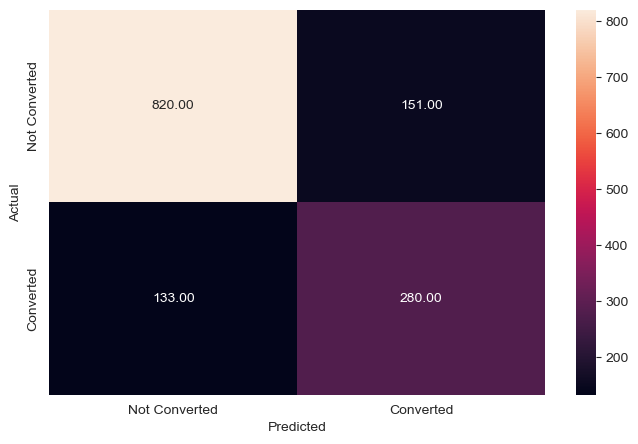

In [33]:
# Checking performance on the test dataset
y_test_pred_dt = dt.predict(X_test_scaled)

metrics_score(y_test, y_test_pred_dt)

Model seems to be overfitting to training data. Lets take a look at feature importance:

<Axes: xlabel='Importance'>

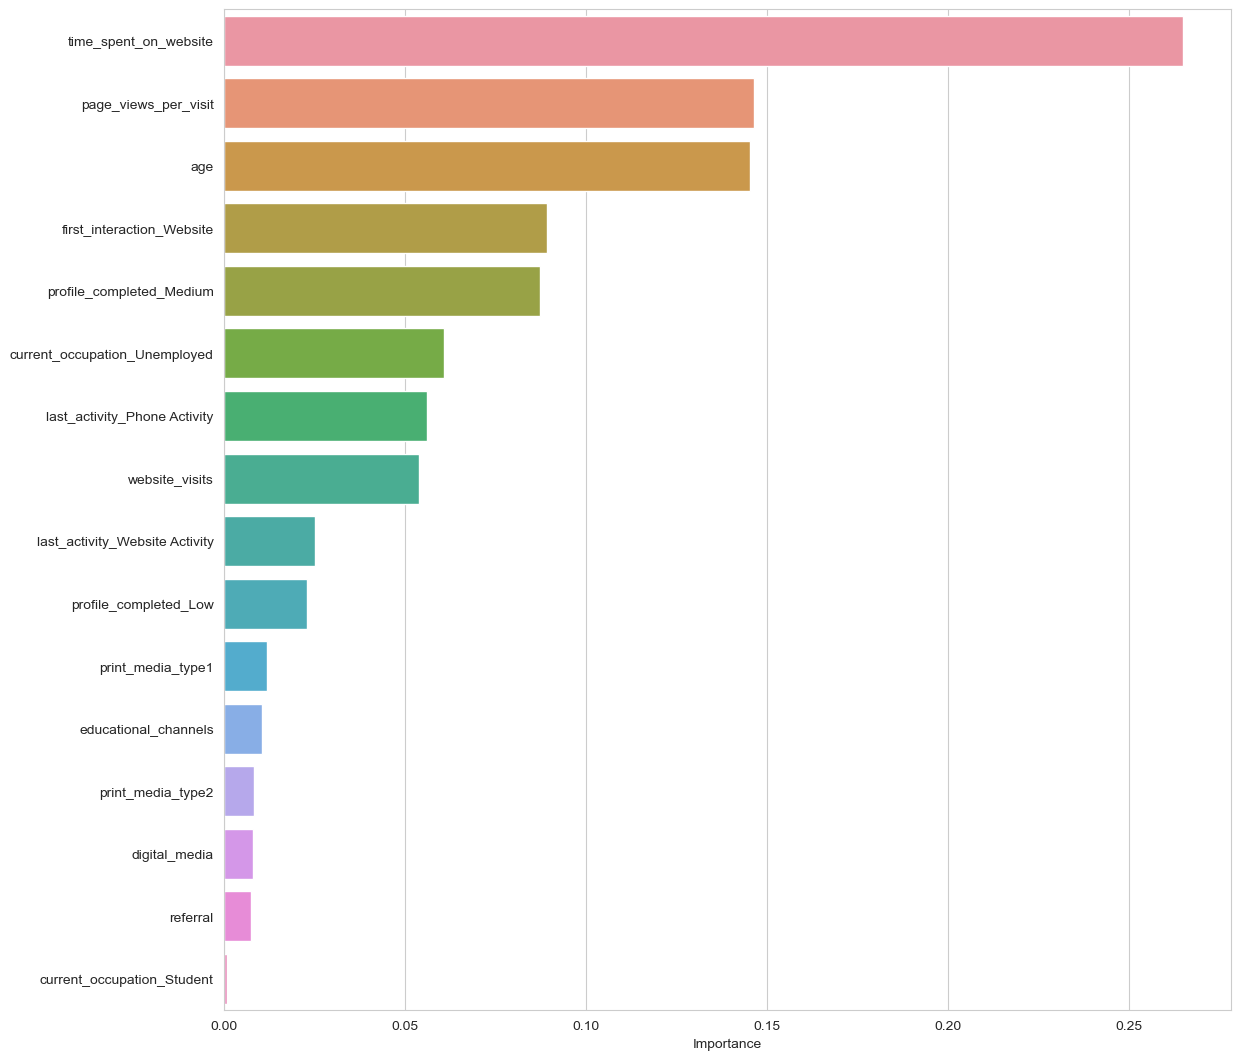

In [34]:
importances = dt.feature_importances_
columns = X.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (13, 13))
sns.barplot(data = importance_df, x = importance_df.Importance, y = importance_df.index)

- Here we can see that time spent on website, page views per visit and age are the most important features for conversion.
- Profile completion medium, first interaction website and currect occupation unemployed are somewhat important too.


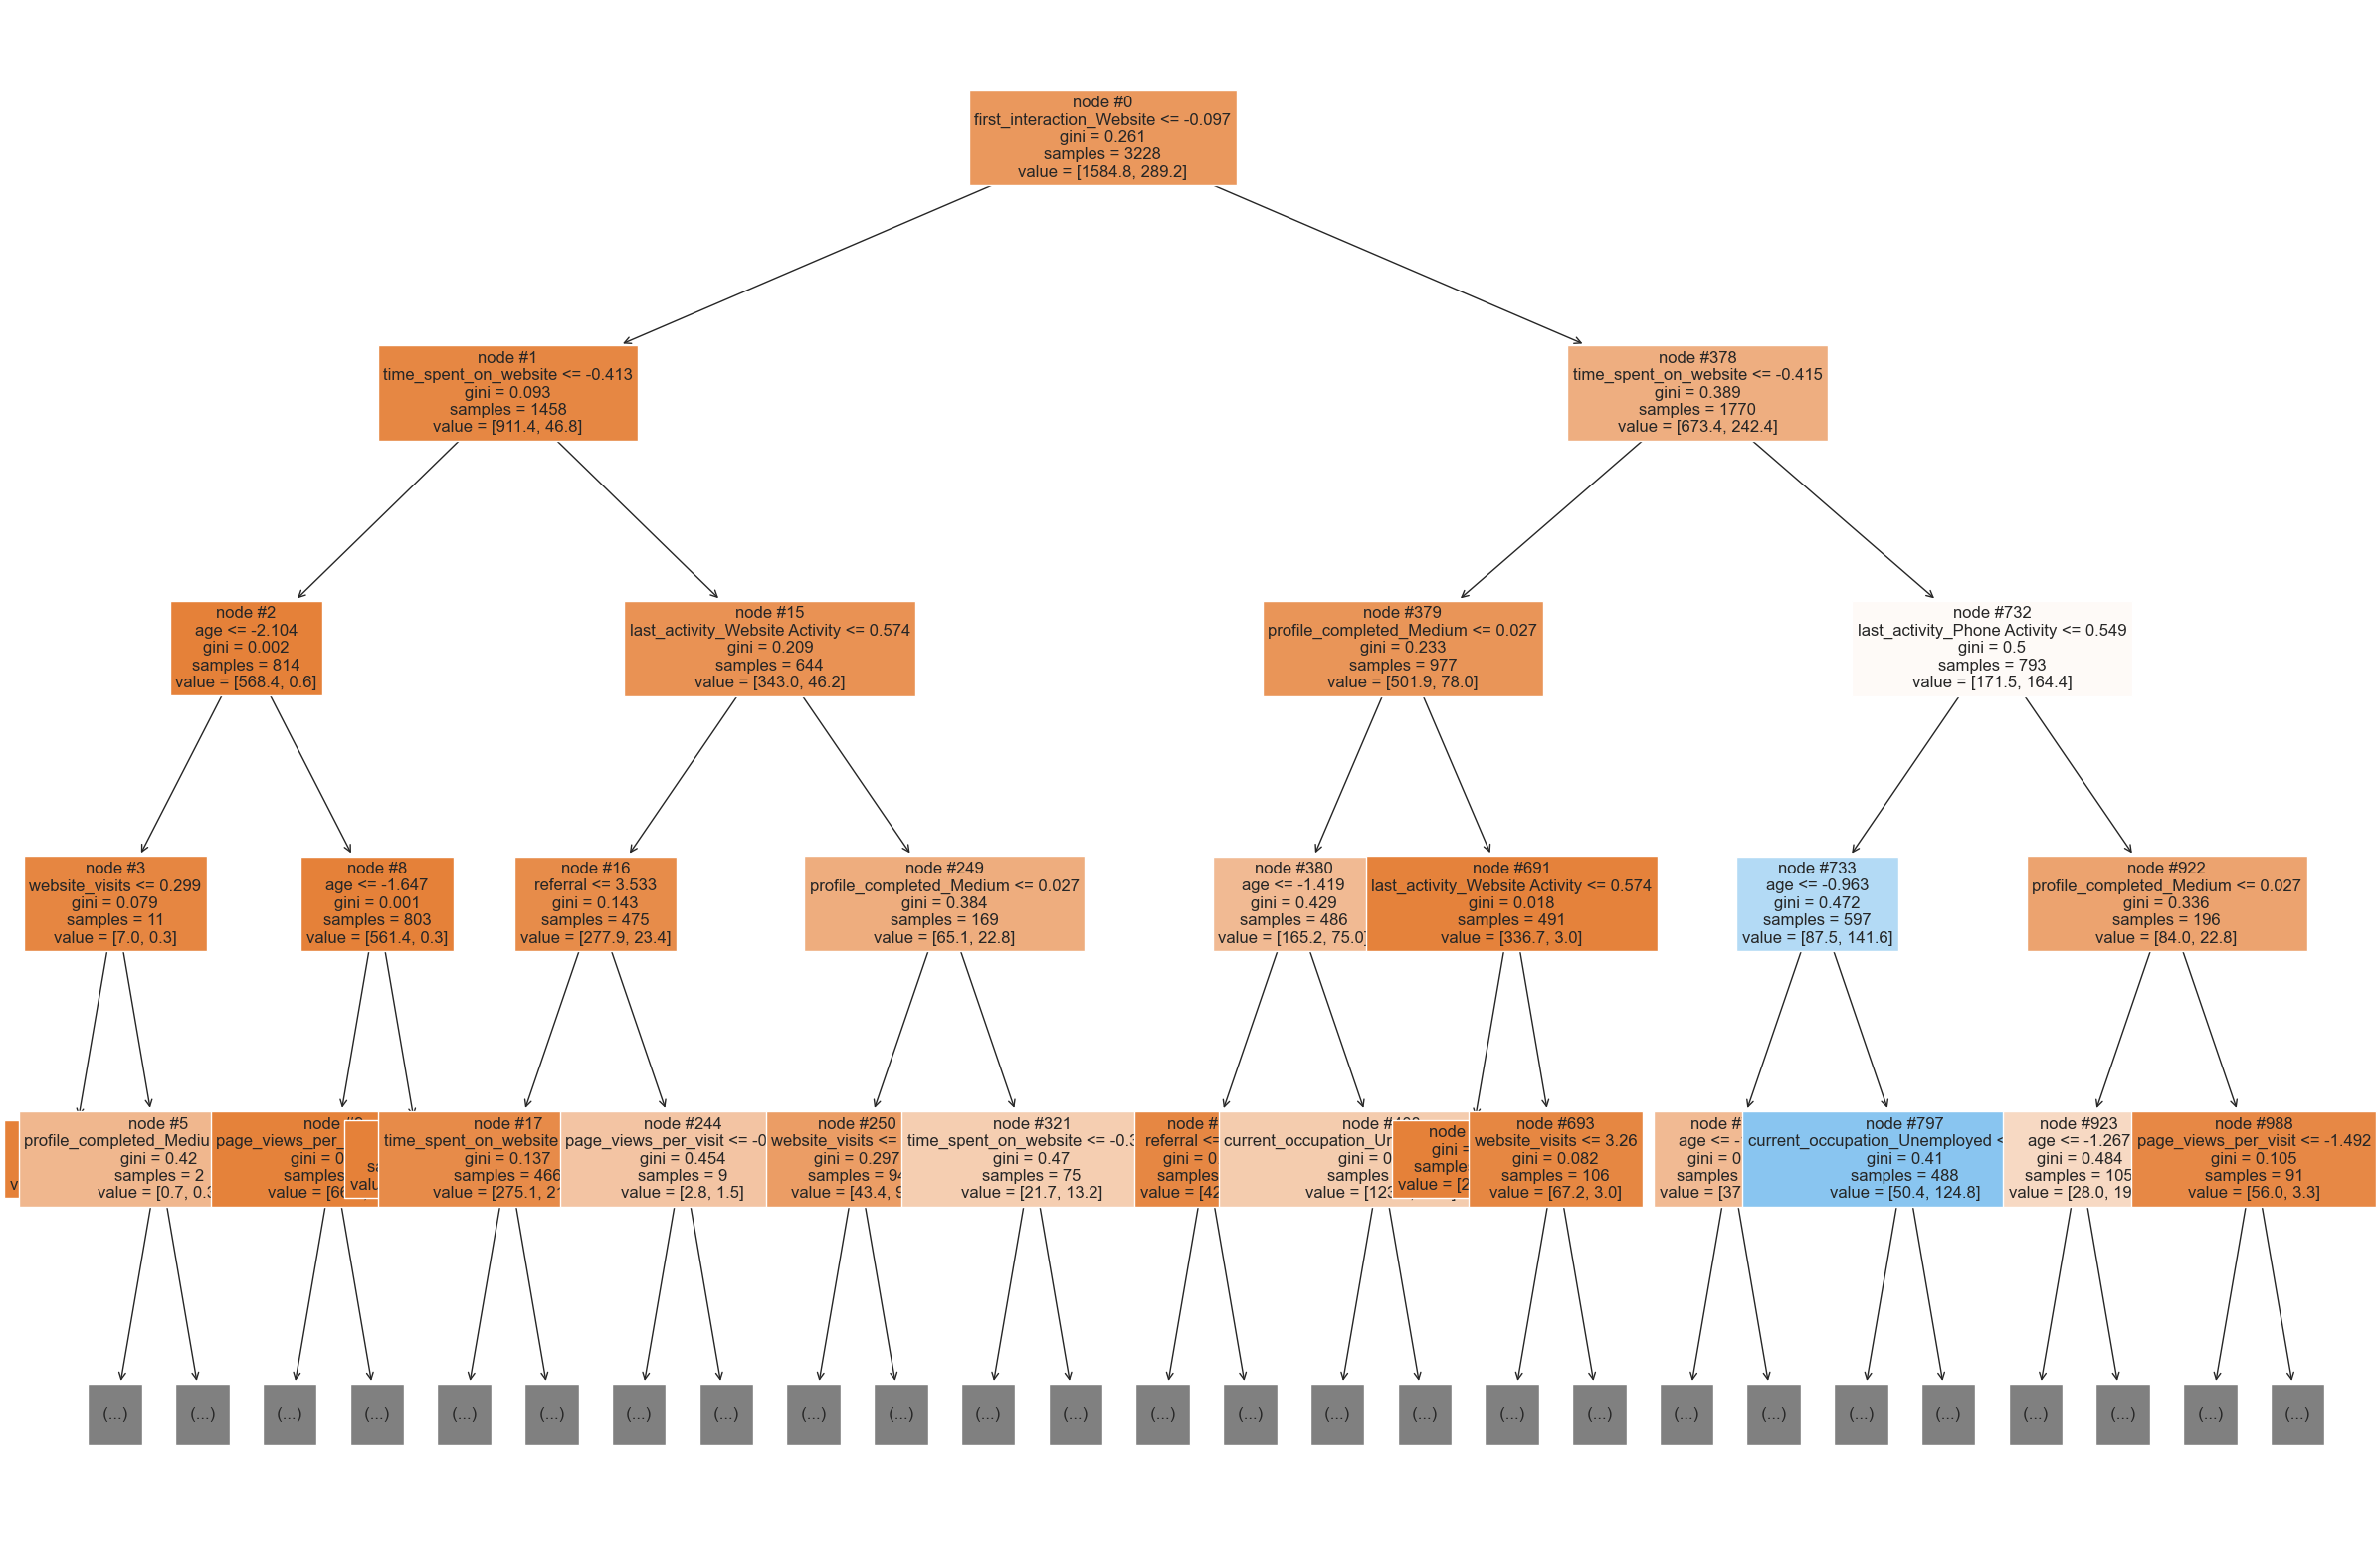

In [35]:
features = list(X.columns)

plt.figure(figsize = (30, 20))

tree.plot_tree(dt, max_depth = 4, feature_names = features, filled = True, fontsize = 12, node_ids = True)

plt.show()

Blue leaves represent conversion.

## Do we need to prune the tree?

We are going to optimize the tree towards recall (minimize FN)

In [36]:
# Define the search space
space = {
    'max_depth': hp.quniform('max_depth', 1, 20, 1),  # Allow deeper trees
    'criterion': hp.choice('criterion', ['gini', 'entropy']),
    'min_samples_split': hp.uniform('min_samples_split', 0.1, 1.0),  # Fraction of total samples
    'min_samples_leaf': hp.uniform('min_samples_leaf', 0.05, 0.5),  # Fraction of total samples
    'max_features': hp.choice('max_features', ['sqrt', 'log2', None]),  # Feature subset selection
}

# Objective function to optimize
def objective(params):
    params['max_depth'] = int(params['max_depth'])  # Convert max_depth to integer
    model = DecisionTreeClassifier(random_state=42, class_weight={0: 0.3, 1: 0.7}, **params)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    recall = metrics.recall_score(y_test, y_pred, pos_label=1)
    return {'loss': -recall, 'status': STATUS_OK}

# Optimization
trials = Trials()
best = fmin(objective, space, algo=tpe.suggest, max_evals=100, trials=trials)

# Get the best parameters
best_params = space_eval(space, best)

# Train the model with the best parameters
best_params['max_depth'] = int(best_params['max_depth'])  # Convert max_depth to integer
d_tree_tuned = DecisionTreeClassifier(random_state=42, class_weight={0: 0.3, 1: 0.7}, **best_params)
d_tree_tuned.fit(X_train_scaled, y_train)

100%|██████████| 100/100 [00:01<00:00, 74.36trial/s, best loss: -0.9467312348668281]


DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, max_depth=16,
                       max_features='log2',
                       min_samples_leaf=0.10856386192801779,
                       min_samples_split=0.9220626014290146, random_state=42)

              precision    recall  f1-score   support

           0       0.88      0.16      0.27      2264
           1       0.32      0.95      0.48       964

    accuracy                           0.39      3228
   macro avg       0.60      0.55      0.38      3228
weighted avg       0.71      0.39      0.33      3228



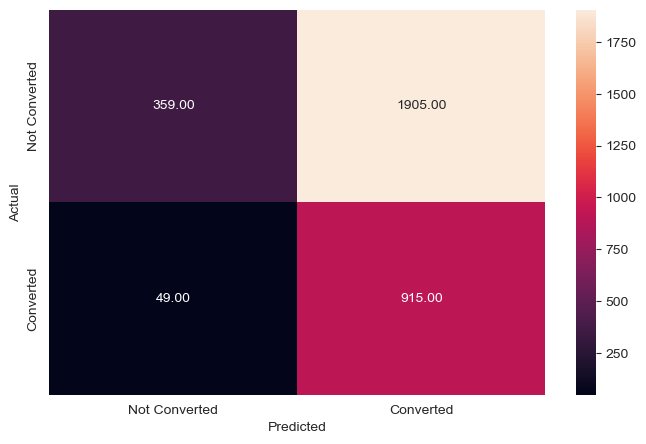

In [38]:
# Training data

y_train_pred_dt2 = d_tree_tuned.predict(X_train_scaled)

score_train = metrics_score(y_train, y_train_pred_dt2)

              precision    recall  f1-score   support

           0       0.88      0.16      0.27       971
           1       0.32      0.95      0.48       413

    accuracy                           0.40      1384
   macro avg       0.60      0.55      0.38      1384
weighted avg       0.71      0.40      0.33      1384



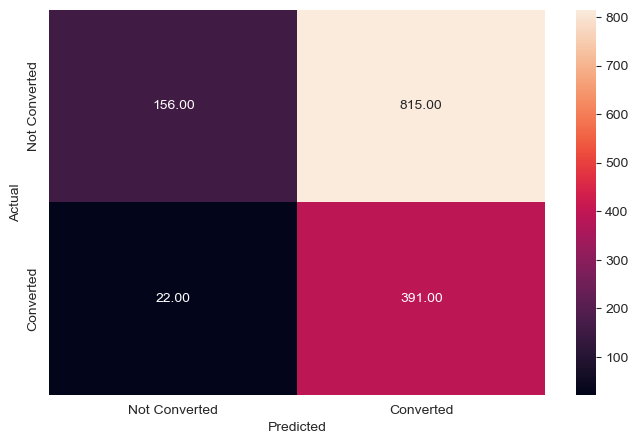

In [39]:
# Test data

y_test_pred_dt2 = d_tree_tuned.predict(X_test_scaled)

score_test = metrics_score(y_test, y_test_pred_dt2)


- We got an overall recall of 0.95, and surely now we are almost not missing any potential customers. But we are targeting a lot of barren prospects.
- Now we can aim to improve precision without affecting recall so much.

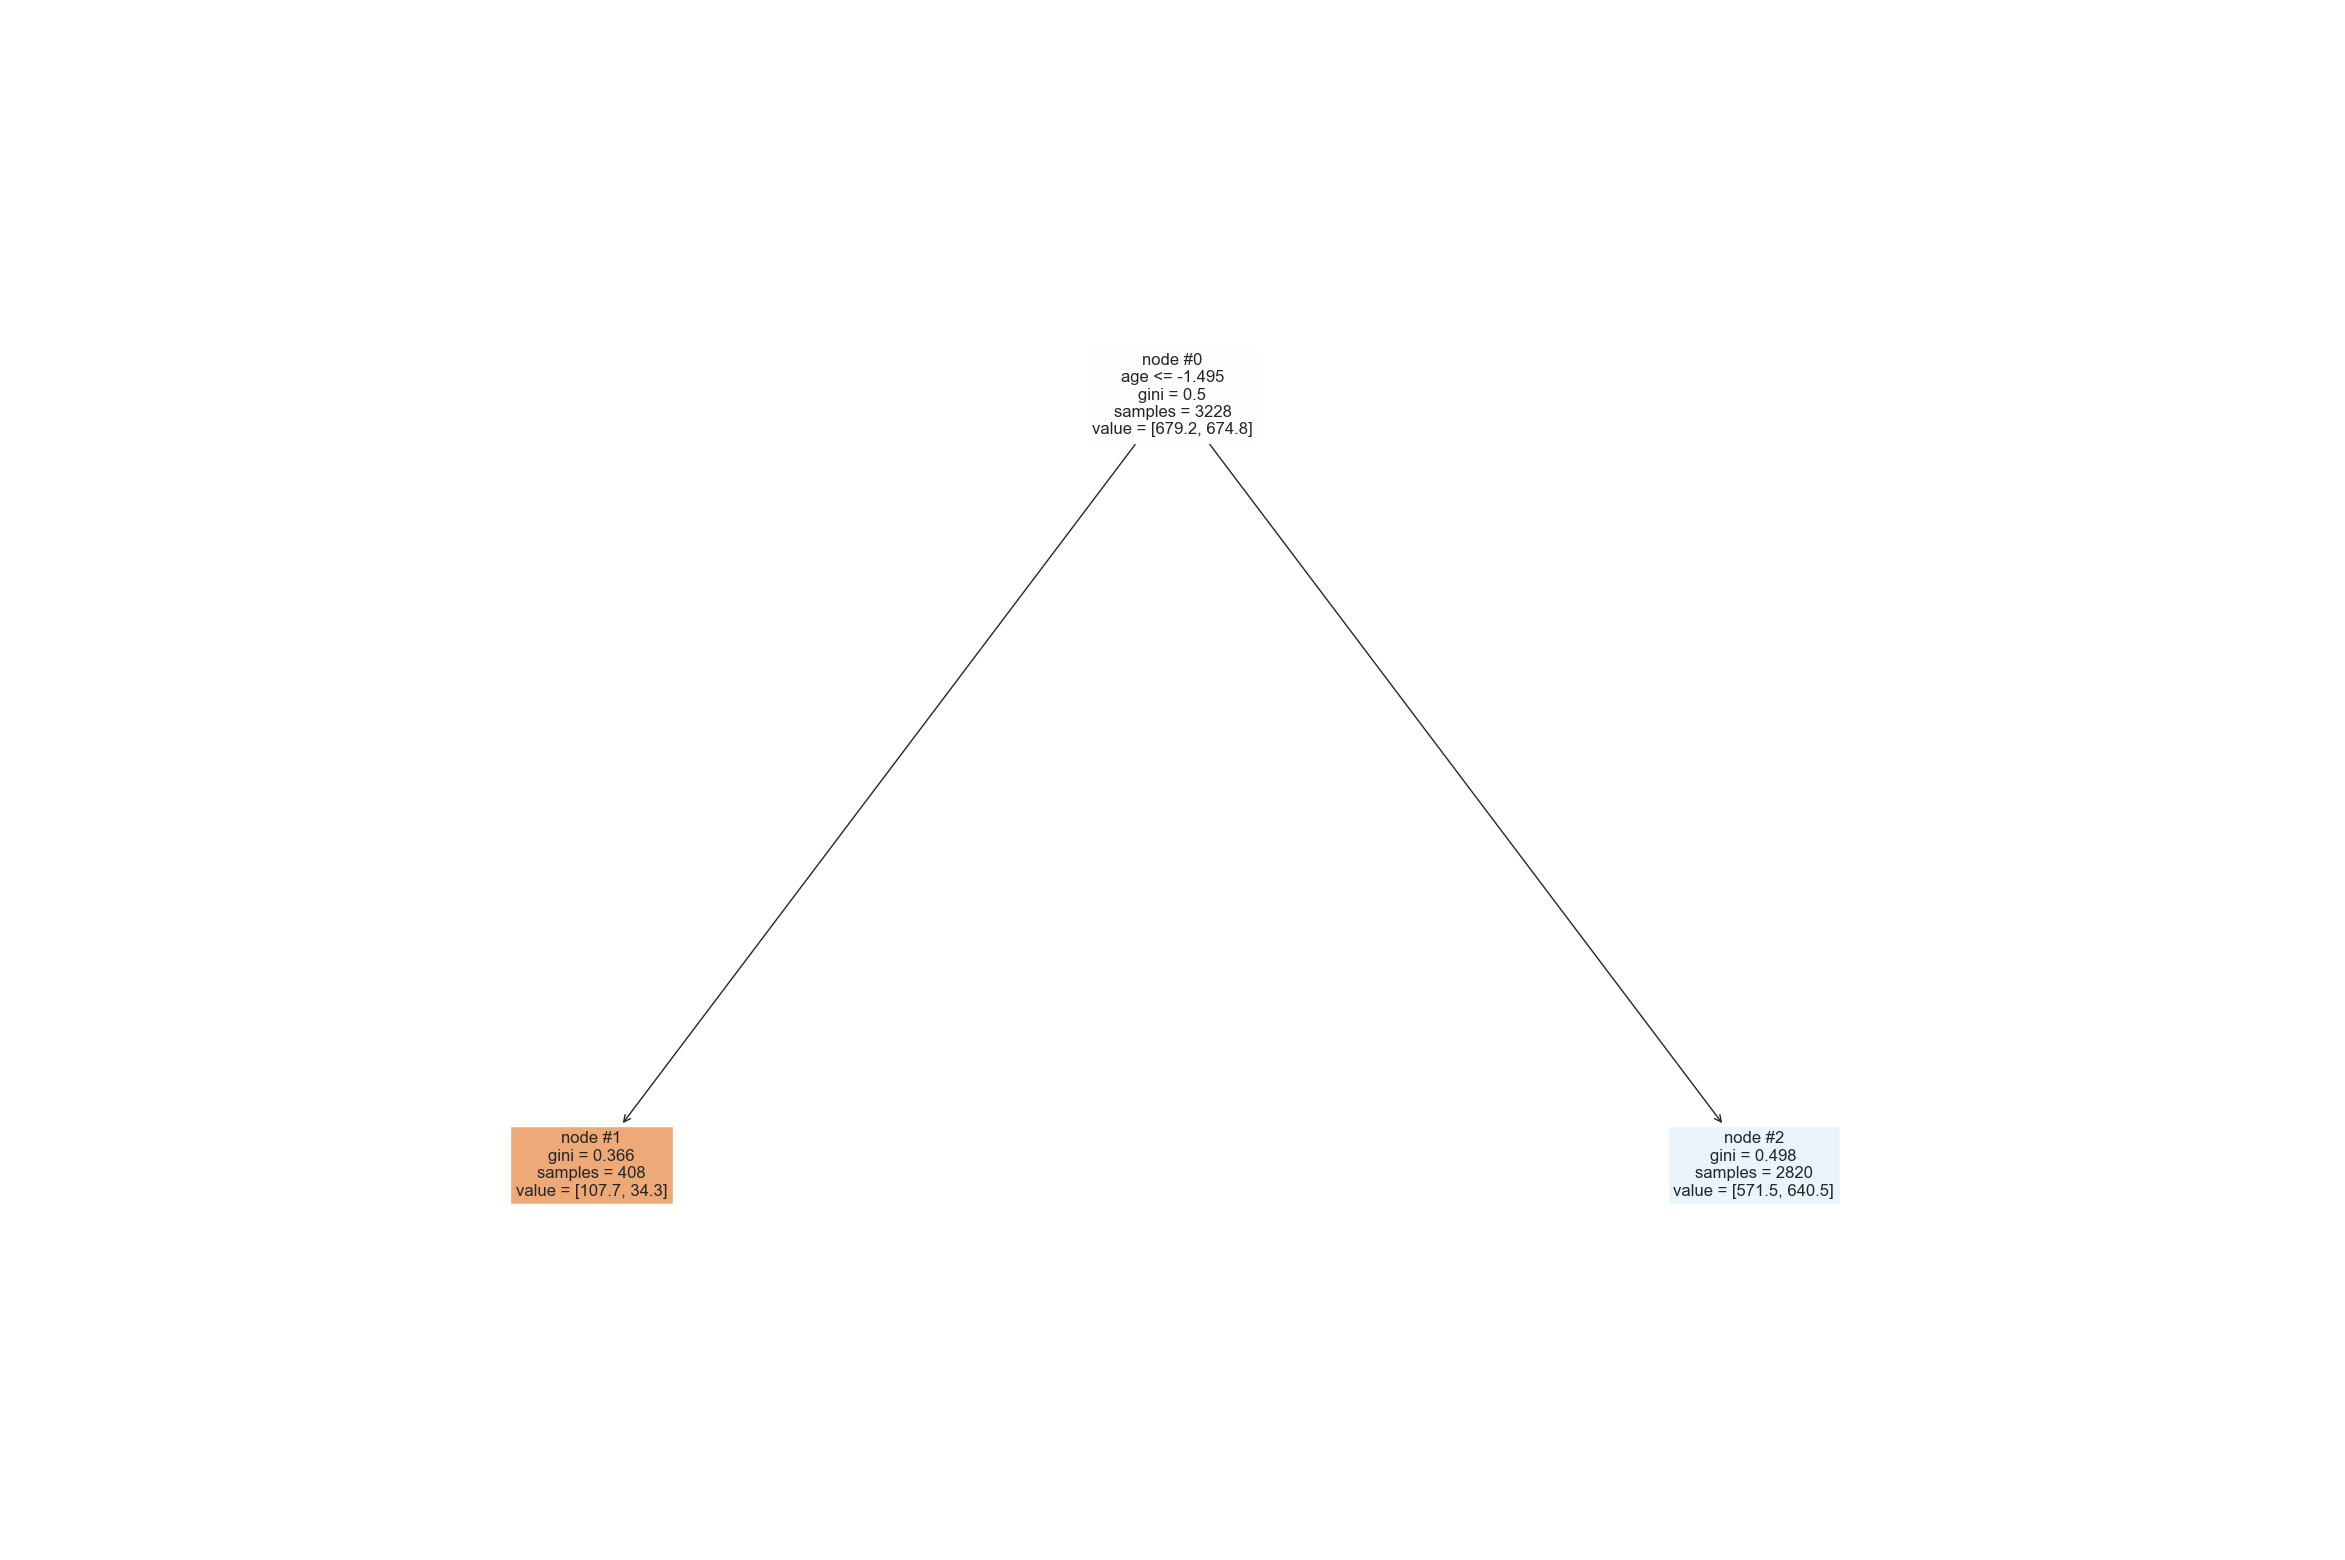

In [40]:
features = list(X.columns)

plt.figure(figsize = (30, 20))

tree.plot_tree(d_tree_tuned, max_depth = 4, feature_names = features, filled = True, fontsize = 12, node_ids = True)

plt.show()

Feature importance for prunned tree:

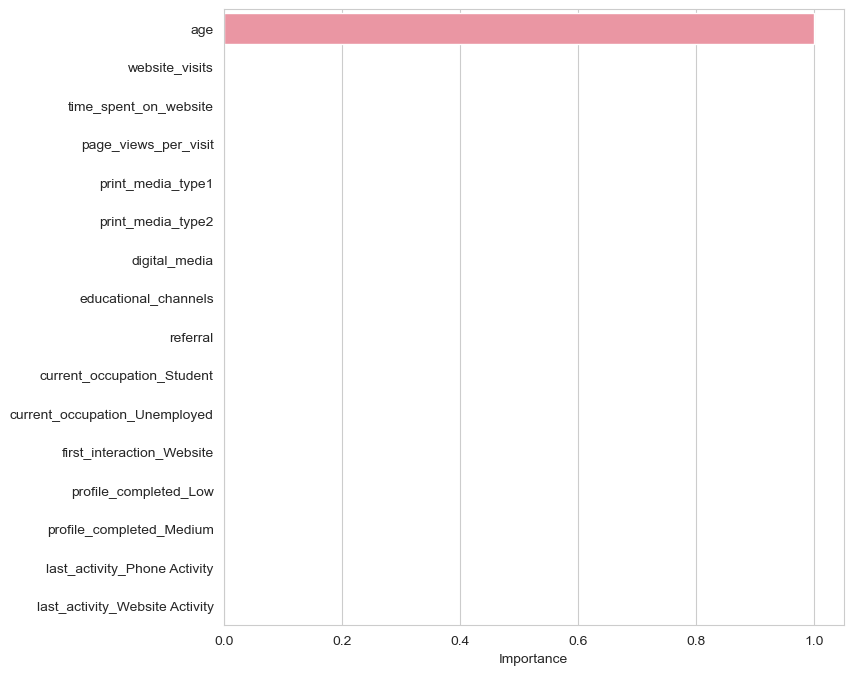

In [41]:
importances = d_tree_tuned.feature_importances_
columns = X.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (8, 8))
sns.barplot(data = importance_df, x = importance_df.Importance, y = importance_df.index);

- The model turned fully towards age as the main indicator, this can serve as a baseline model since optimizing for recall made this overly simplistic model.
- We are gong to try with random forest to use several trees and address several features rather than a single one.

## Building a Random Forest model

We keep the same weights used before

In [42]:
#Create a RandomForestClassifier
rf_estimator = RandomForestClassifier(class_weight = {0: 0.3, 1: 0.7}, random_state=42, n_estimators=100)

#Fit the model on the training data
rf_estimator.fit(X_train_scaled, y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, random_state=42)

              precision    recall  f1-score   support

           0       0.83      0.37      0.51      2264
           1       0.36      0.82      0.50       964

    accuracy                           0.50      3228
   macro avg       0.59      0.59      0.50      3228
weighted avg       0.69      0.50      0.51      3228



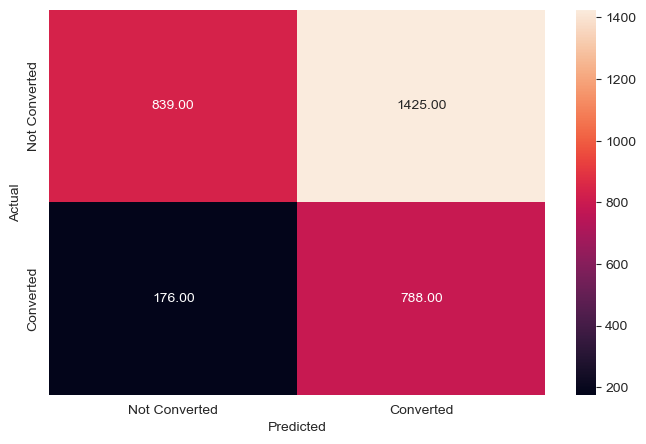

In [43]:
# Checking on training data
y_pred_train_rf = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train_rf)

              precision    recall  f1-score   support

           0       0.80      0.38      0.51       971
           1       0.35      0.78      0.48       413

    accuracy                           0.50      1384
   macro avg       0.58      0.58      0.50      1384
weighted avg       0.67      0.50      0.50      1384



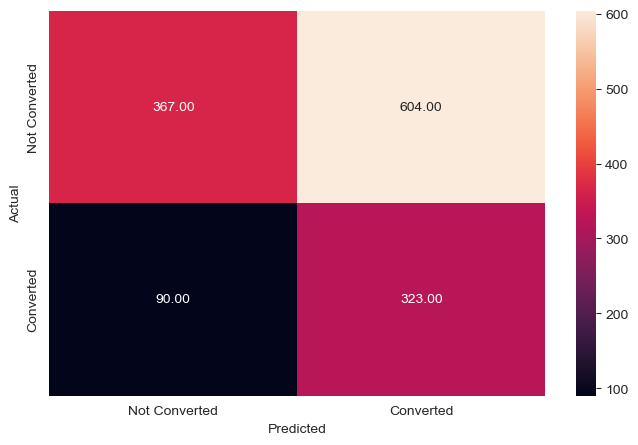

In [44]:
# Checking for test data
y_pred_test_rf = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test_rf)

- We get an improved result for recall, but there might be a lot of wasted resources on actions to reach all the potential positive convertion clients, but still we are missing some of them.
- We can still need to improve precision and avoid wasting resources on false positves.

<Axes: xlabel='Importance'>

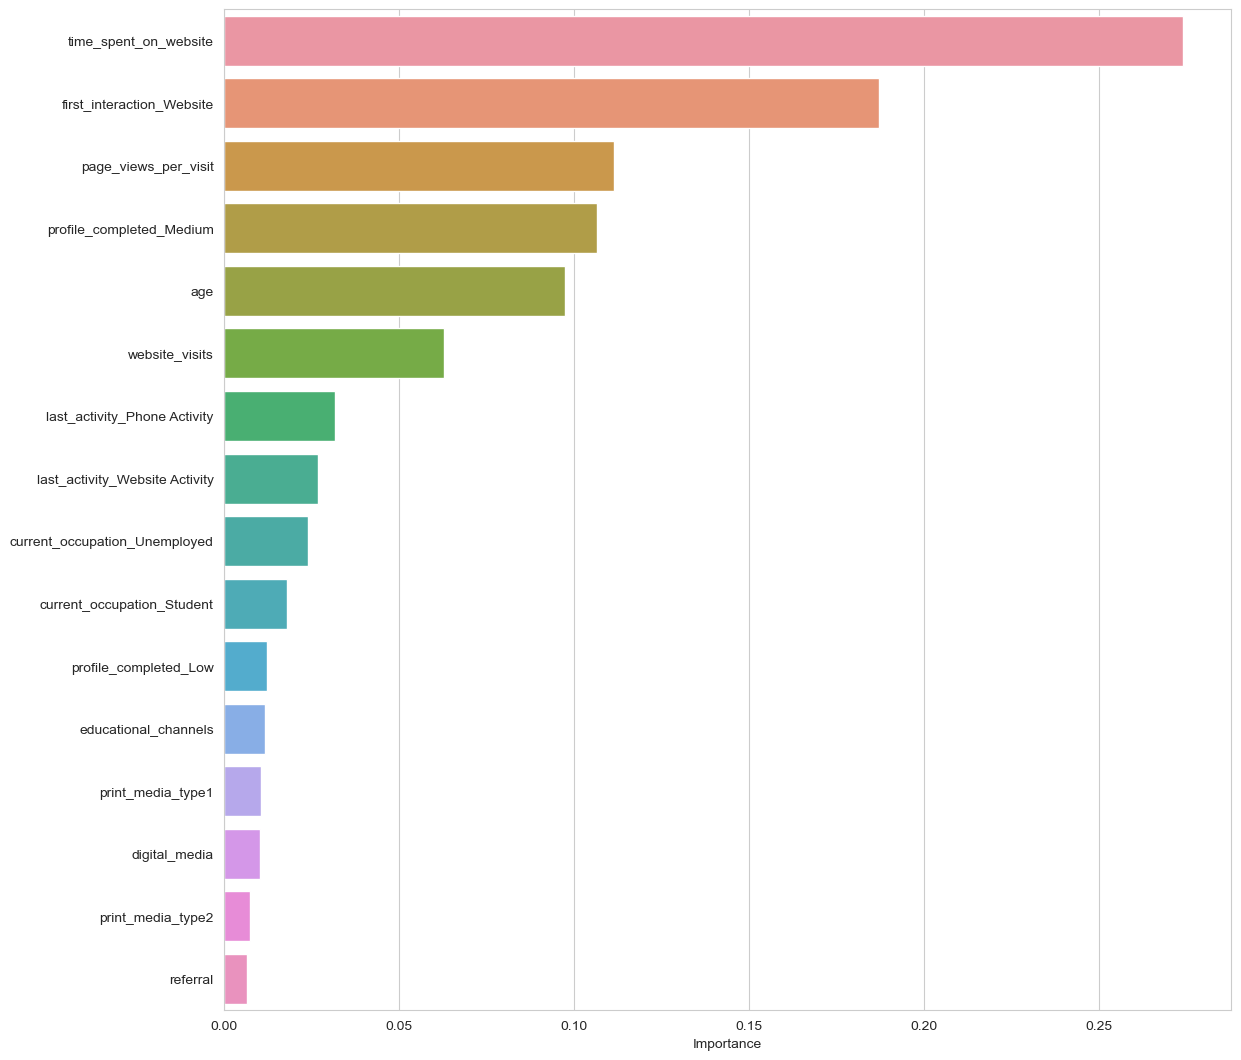

In [45]:
importances = rf_estimator.feature_importances_
columns = X.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (13, 13))
sns.barplot(data = importance_df, x = importance_df.Importance, y = importance_df.index)

We get a similar feature importance plot

## Forest optimization

In [46]:
# Define the search space
space = {
    "n_estimators": hp.choice("n_estimators", [110, 120]),
    "max_depth": hp.choice("max_depth", [6, 7]),
    "min_samples_leaf": hp.choice("min_samples_leaf", [20, 25]),
    "max_features": hp.uniform("max_features", 0.8, 0.9),
    "max_samples": hp.uniform("max_samples", 0.9, 1),
    "class_weight": hp.choice("class_weight", ["balanced", {0: 0.3, 1: 0.7}])
}

# Objective function to optimize
def objective(params):
    # Extracting parameters
    n_estimators = params['n_estimators']
    max_depth = params['max_depth']
    min_samples_leaf = params['min_samples_leaf']
    max_features = params['max_features']
    max_samples = params['max_samples']
    class_weight = params['class_weight']
    
    # Define and train the model
    rf_estimator_tuned = RandomForestClassifier(criterion="entropy",
                                                random_state=7,
                                                n_estimators=n_estimators,
                                                max_depth=max_depth,
                                                min_samples_leaf=min_samples_leaf,
                                                max_features=max_features,
                                                max_samples=max_samples,
                                                class_weight=class_weight)
    
    rf_estimator_tuned.fit(X_train_scaled, y_train)
    
    # Predictions
    y_pred = rf_estimator_tuned.predict(X_test_scaled)
    
    # Calculate recall
    recall = metrics.recall_score(y_test, y_pred, pos_label=1)
    
    return {'loss': -recall, 'status': STATUS_OK}

# Optimization
trials = Trials()
best = fmin(objective, space, algo=tpe.suggest, max_evals=100, trials=trials)

# Get the best parameters
best_params = space_eval(space, best)

# Train the model with the best parameters
rf_estimator_tuned = RandomForestClassifier(criterion="entropy",
                                             random_state=7,
                                             n_estimators=best_params['n_estimators'],
                                             max_depth=best_params['max_depth'],
                                             min_samples_leaf=best_params['min_samples_leaf'],
                                             max_features=best_params['max_features'],
                                             max_samples=best_params['max_samples'],
                                             class_weight=best_params['class_weight'])

rf_estimator_tuned.fit(X_train_scaled, y_train)

  0%|          | 0/100 [00:00<?, ?trial/s, best loss=?]

100%|██████████| 100/100 [01:24<00:00,  1.18trial/s, best loss: -0.8523002421307506]


RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='entropy',
                       max_depth=6, max_features=0.8709042189305799,
                       max_samples=0.9670982137779364, min_samples_leaf=25,
                       n_estimators=110, random_state=7)

              precision    recall  f1-score   support

           0       0.94      0.82      0.88      2264
           1       0.68      0.88      0.77       964

    accuracy                           0.84      3228
   macro avg       0.81      0.85      0.82      3228
weighted avg       0.86      0.84      0.85      3228



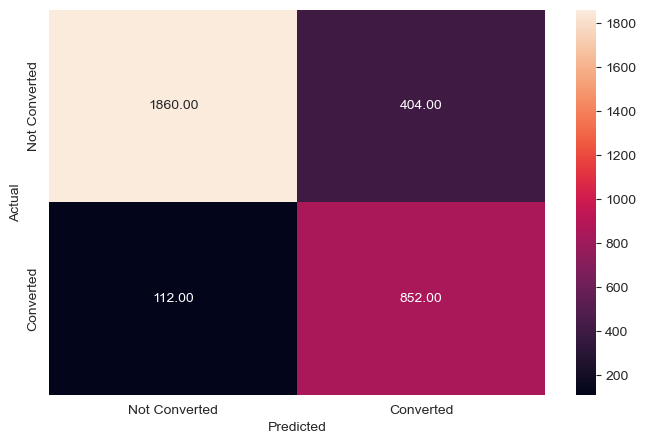

In [47]:
y_train_pred_dt = rf_estimator_tuned.predict(X_train_scaled)

metrics_score(y_train, y_train_pred_dt)

              precision    recall  f1-score   support

           0       0.93      0.81      0.86       971
           1       0.66      0.85      0.74       413

    accuracy                           0.82      1384
   macro avg       0.79      0.83      0.80      1384
weighted avg       0.85      0.82      0.83      1384



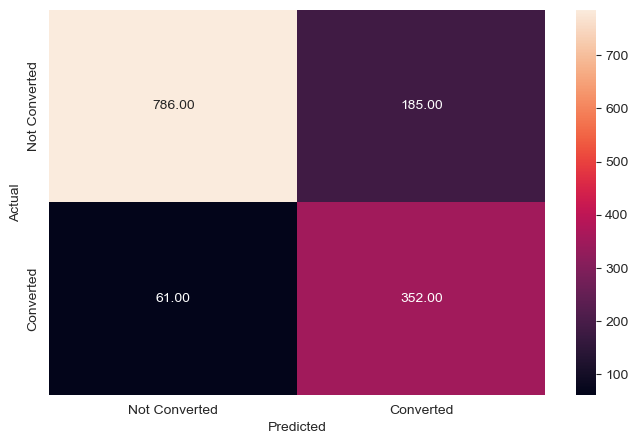

In [48]:
y_test_pred_dt = rf_estimator_tuned.predict(X_test_scaled)

metrics_score(y_test, y_test_pred_dt)

#### Observations
- Now have a better balance between precision and recall, both over 0.8 with good generalization for training and test sets.
- the f1 score is well-balanced for both classes.
- The recall scores correspond to what the company needs and reduce as good as possible the false positives while avoiding false negatives.

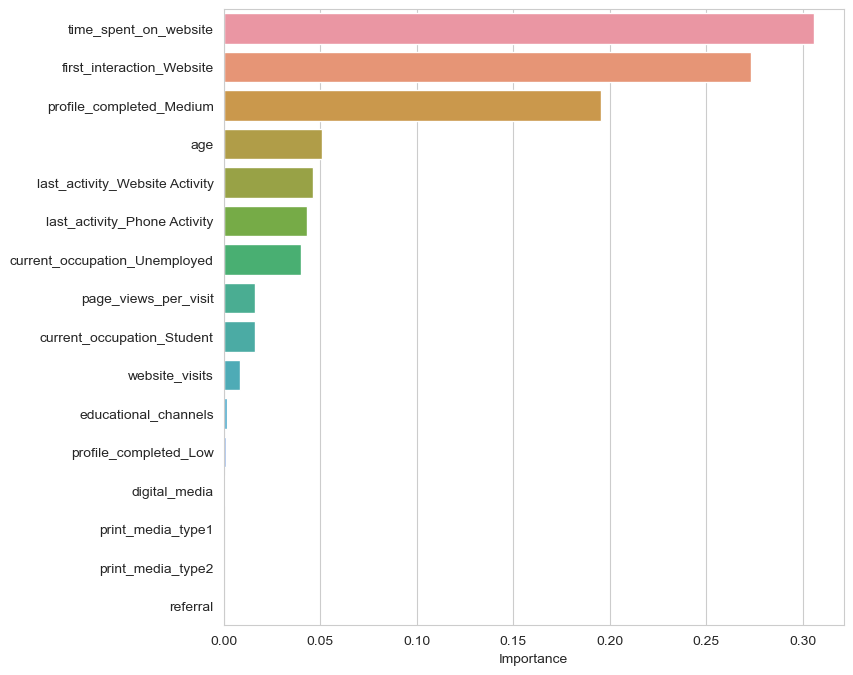

In [49]:
importances = rf_estimator_tuned.feature_importances_ 
columns = X.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (8, 8))
sns.barplot(data = importance_df, x = importance_df.Importance, y = importance_df.index);

- In this case, the model uses the features with the most importance while avoiding features related to the channel, which as we saw in the EDA only adds some noise.
- However, as we wanted, the forest can take into account more features more effectively than the single tree, which is what allowed the improvement of the model.

## Actionable Insights and Recommendations

- **Advertising Expenditure:** The company may lower advertising in print media and divert ad spending on the internet to promote the company's website. Digital media ads are also cheaper than using print media, and they have a bigger reach. Investing in educational channels such as selected newsletters would prove to be more effective than print. However, ensure thorough analysis of ROI for each advertising channel to optimize spending effectively.
- **Customer Segmentation:** The company should continue to reach out to professionals and the unemployed, tailoring its offerings to this segment of the population, to make that more effective the platform should leverage age-related themes for the courses to increase the common themes and prolong the relationship and encourage referrals.
- **Website UX improvement:** Improving customer experience while using the website might increase the amount of time leads spend exploring the content, it's proven that a good UX increases the turnover rate. Of course, it's paramount to enrich the content to captivate them and make good use of that first impression.
- **Customer support:** In hand with the UX improvement, the company must modernize with instant support features such as online support to allow people to ask questions and improve processes to respond quickly and streamline the lead conversion process. 
- **Personalized campaigns:** PErsonalze campaigns leveraging on the information within profiles, aligning the marketing strategies with the customer preferences, this will require encouraging profile completion and giving incentives such as discounts or giveaways. that could potentially lead to more leads and income.
- **Continuous Improving** We can't leave out the importance of continuous analysis and adaptation based on data insights to drive ongoing improvements in lead conversion performance.
- **Lead Profile:** Our findings show that the lead the is more probable to convert might have this profile:
    - Spend a lot of time in the website
    - It's first interaction is through the website, not mobile.
    - It's profile is at least and medium completion.
